2017 to 2021 Data:

This dataset appears to represent historical BTC/USDT (Bitcoin to US Dollar Tether) market data for each minute or at another fine time interval from 2017 to 2021.
Columns in the dataset:
unix: The Unix timestamp representing the date and time in seconds since 1970-01-01 00:00:00 UTC.
date: The human-readable date and time corresponding to the Unix timestamp.
symbol: The trading pair symbol, in this case, BTC/USD.
open: The opening price of Bitcoin at the given timestamp.
high: The highest price of Bitcoin reached during the given time interval.
low: The lowest price of Bitcoin during the given time interval.
close: The closing price of Bitcoin at the end of the given time interval.
Volume BTC: The total volume of Bitcoin traded during the given time interval.
 Volume USD: The total volume of trades in US dollars during the given time interval.




*   2017 and all data represent every minute of every hour of every day of the year
*   the daily data represents day vise statistics from 28 nov 2014 to 1 march 2022


*   the horly data shows hourly statistics for each day from 15 may 2018 to 1 march 2022


Task 1: Predictive Model for Future Stock Prices
Objective:
To develop a model that predicts future BTC/USDT prices using historical data from 2017 to 2021, with a specific focus on minimizing the Mean Squared Error (MSE) of predictions.





In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
df=pd.read_csv('/content/BTC-Daily.csv')

In [329]:
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


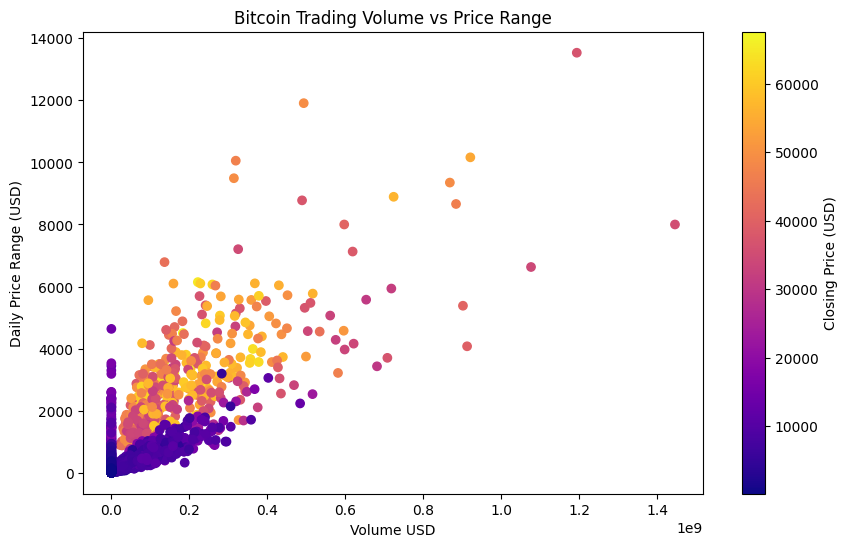

In [330]:
# @title Bitcoin Trading Volume vs Price Range

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Volume USD'], df['high'] - df['low'], c=df['close'], cmap='plasma')
plt.title('Bitcoin Trading Volume vs Price Range')
plt.xlabel('Volume USD')
plt.ylabel('Daily Price Range (USD)')
_ = plt.colorbar(label='Closing Price (USD)')


In [331]:
from datetime import datetime

# Unix timestamp
unix_timestamp = 1646092800

# Convert to datetime
date_time = datetime.utcfromtimestamp(unix_timestamp)

# Print the result
print(date_time)


2022-03-01 00:00:00


Both unix and 2nd col show same info so we drop unix

In [332]:
df.drop('unix',axis=1,inplace=True)
df.drop('symbol',axis=1,inplace=True)

In [333]:
import pandas as pd
df['date'] = pd.to_datetime(df['date']).dt.date


In [334]:
df

,date,open,high,low,close,Volume BTC,Volume USD
0,2022-03-01,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,2022-02-28,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,2022-02-27,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,2022-02-26,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,2022-02-25,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...
2646,2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


HERE 2021 IS TEST DATA AND 2014 TO 2020 IS TRAIN DATA

In [335]:
# prompt: take index col as last
df = df.set_index('date')
df

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2022-03-01,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
2022-02-28,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2022-02-27,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
2022-02-26,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
2022-02-25,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...
2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03


<Axes: xlabel='date'>

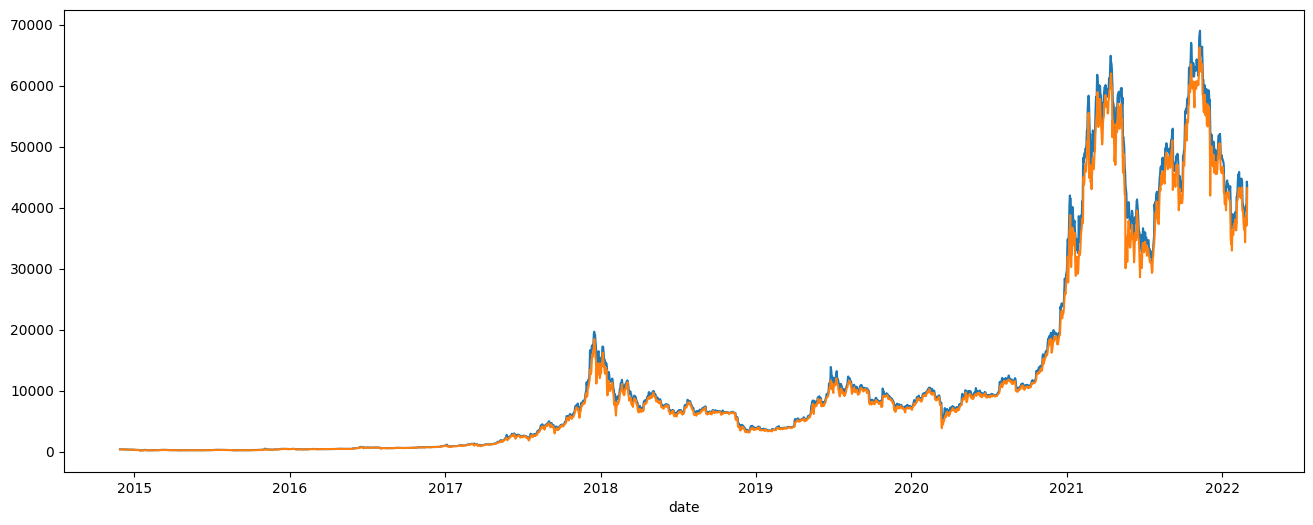

In [336]:

df['high'].plot(figsize=(16,6))
df['low'].plot(figsize=(16,6))

<Axes: xlabel='date'>

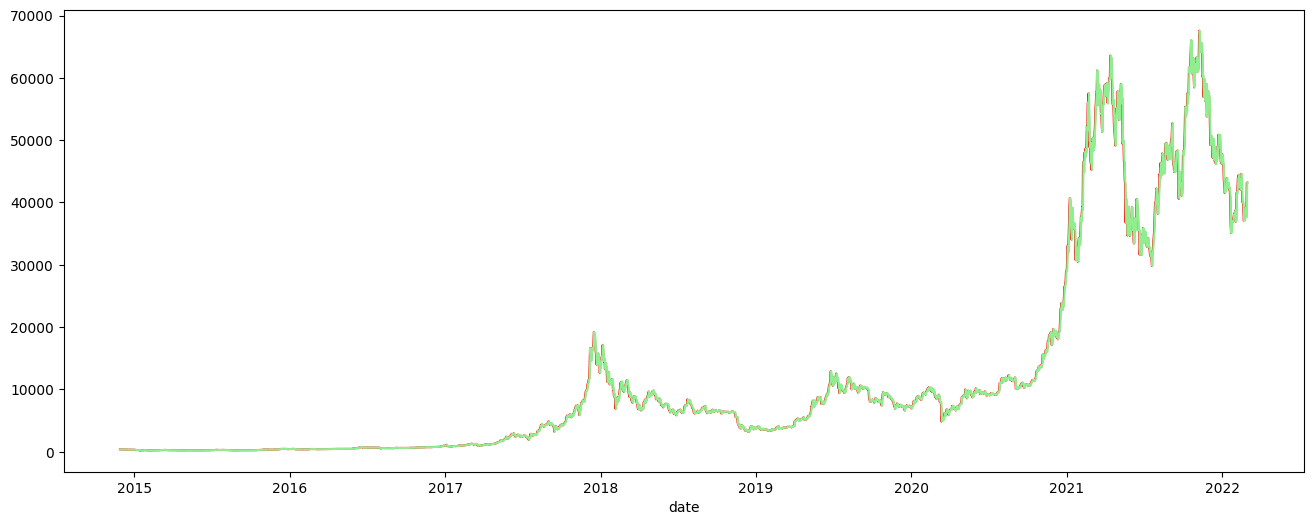

In [337]:


df['close'].plot(figsize=(16,6), color='red')
df['open'].plot(figsize=(16,6), color='lightgreen')


In [338]:
# prompt: show me year wise max and min of all cols
df.describe()


,open,high,low,close,Volume BTC,Volume USD
count,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
std,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08
min,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


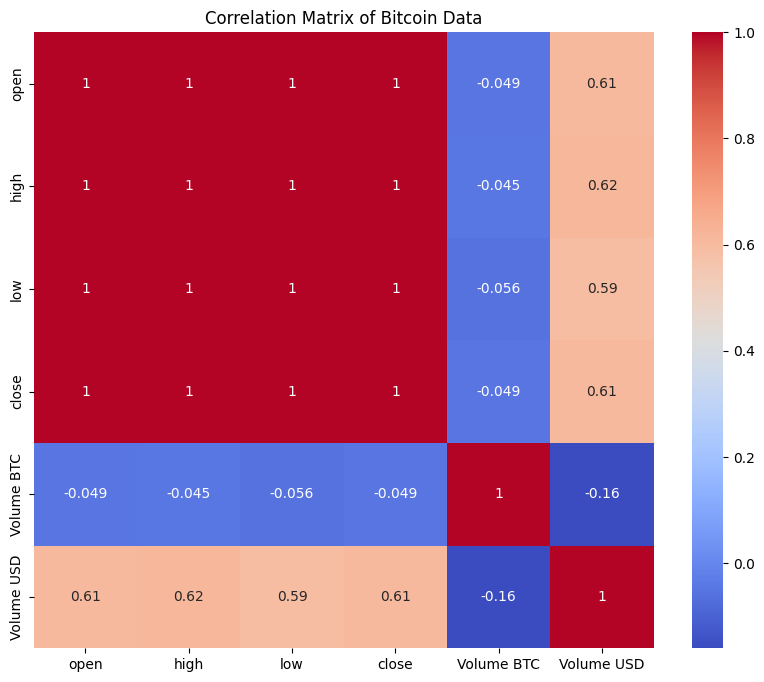

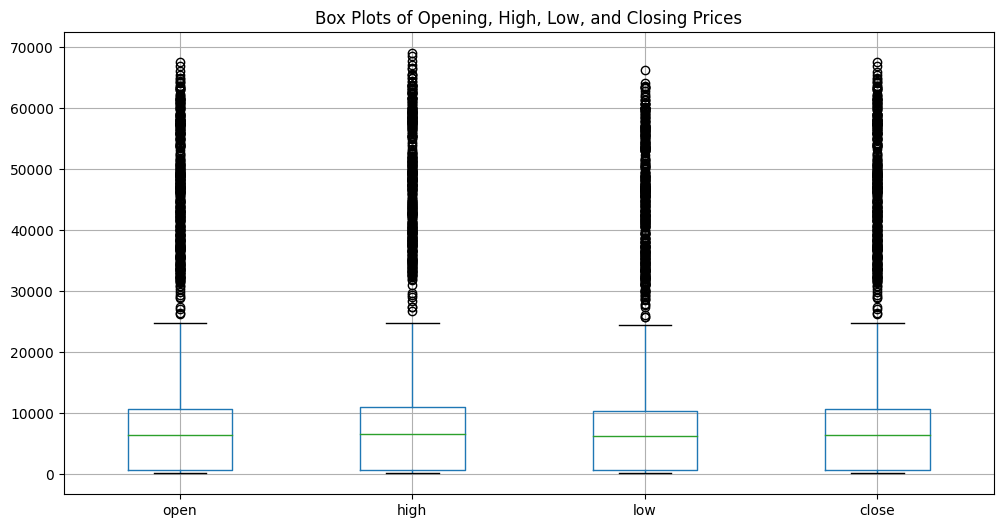

<Figure size 1200x600 with 0 Axes>

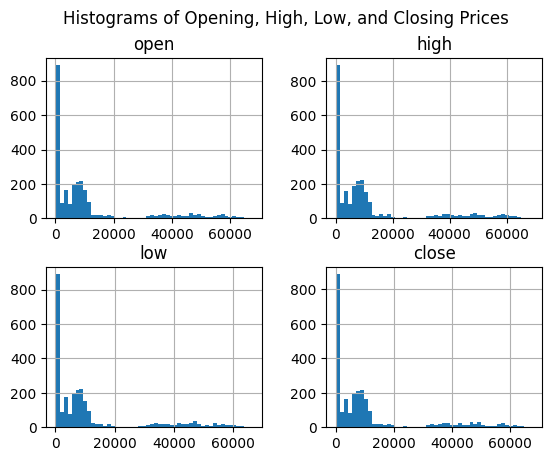

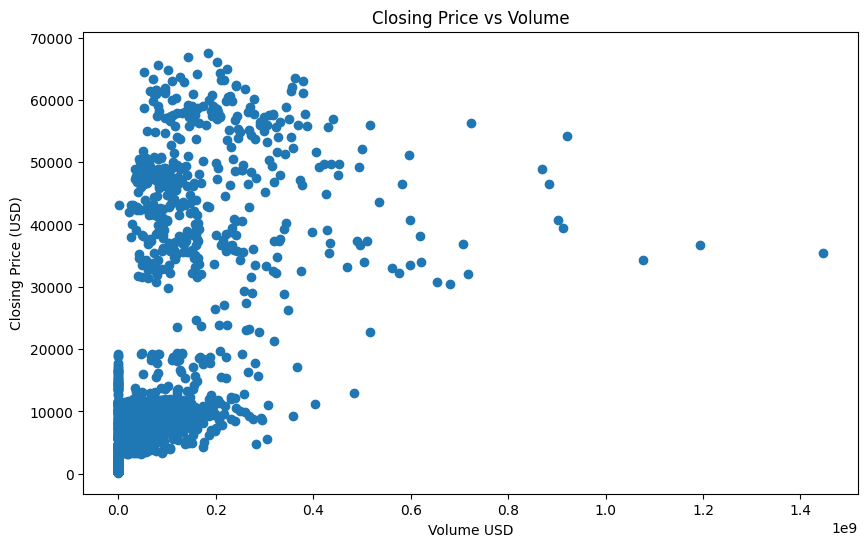

In [339]:

import matplotlib.pyplot as plt

numerical_features = df.select_dtypes(include=['number'])
corr_matrix = numerical_features.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Bitcoin Data')
plt.show()

# Box plots for key features
plt.figure(figsize=(12, 6))
df[['open', 'high', 'low', 'close']].boxplot()
plt.title('Box Plots of Opening, High, Low, and Closing Prices')
plt.show()

# Histograms for key features
plt.figure(figsize=(12, 6))
df[['open', 'high', 'low', 'close']].hist(bins=50)
plt.suptitle('Histograms of Opening, High, Low, and Closing Prices')
plt.show()

# Scatter plot of closing price vs volume
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume USD'], df['close'])
plt.title('Closing Price vs Volume')
plt.xlabel('Volume USD')
plt.ylabel('Closing Price (USD)')
plt.show()


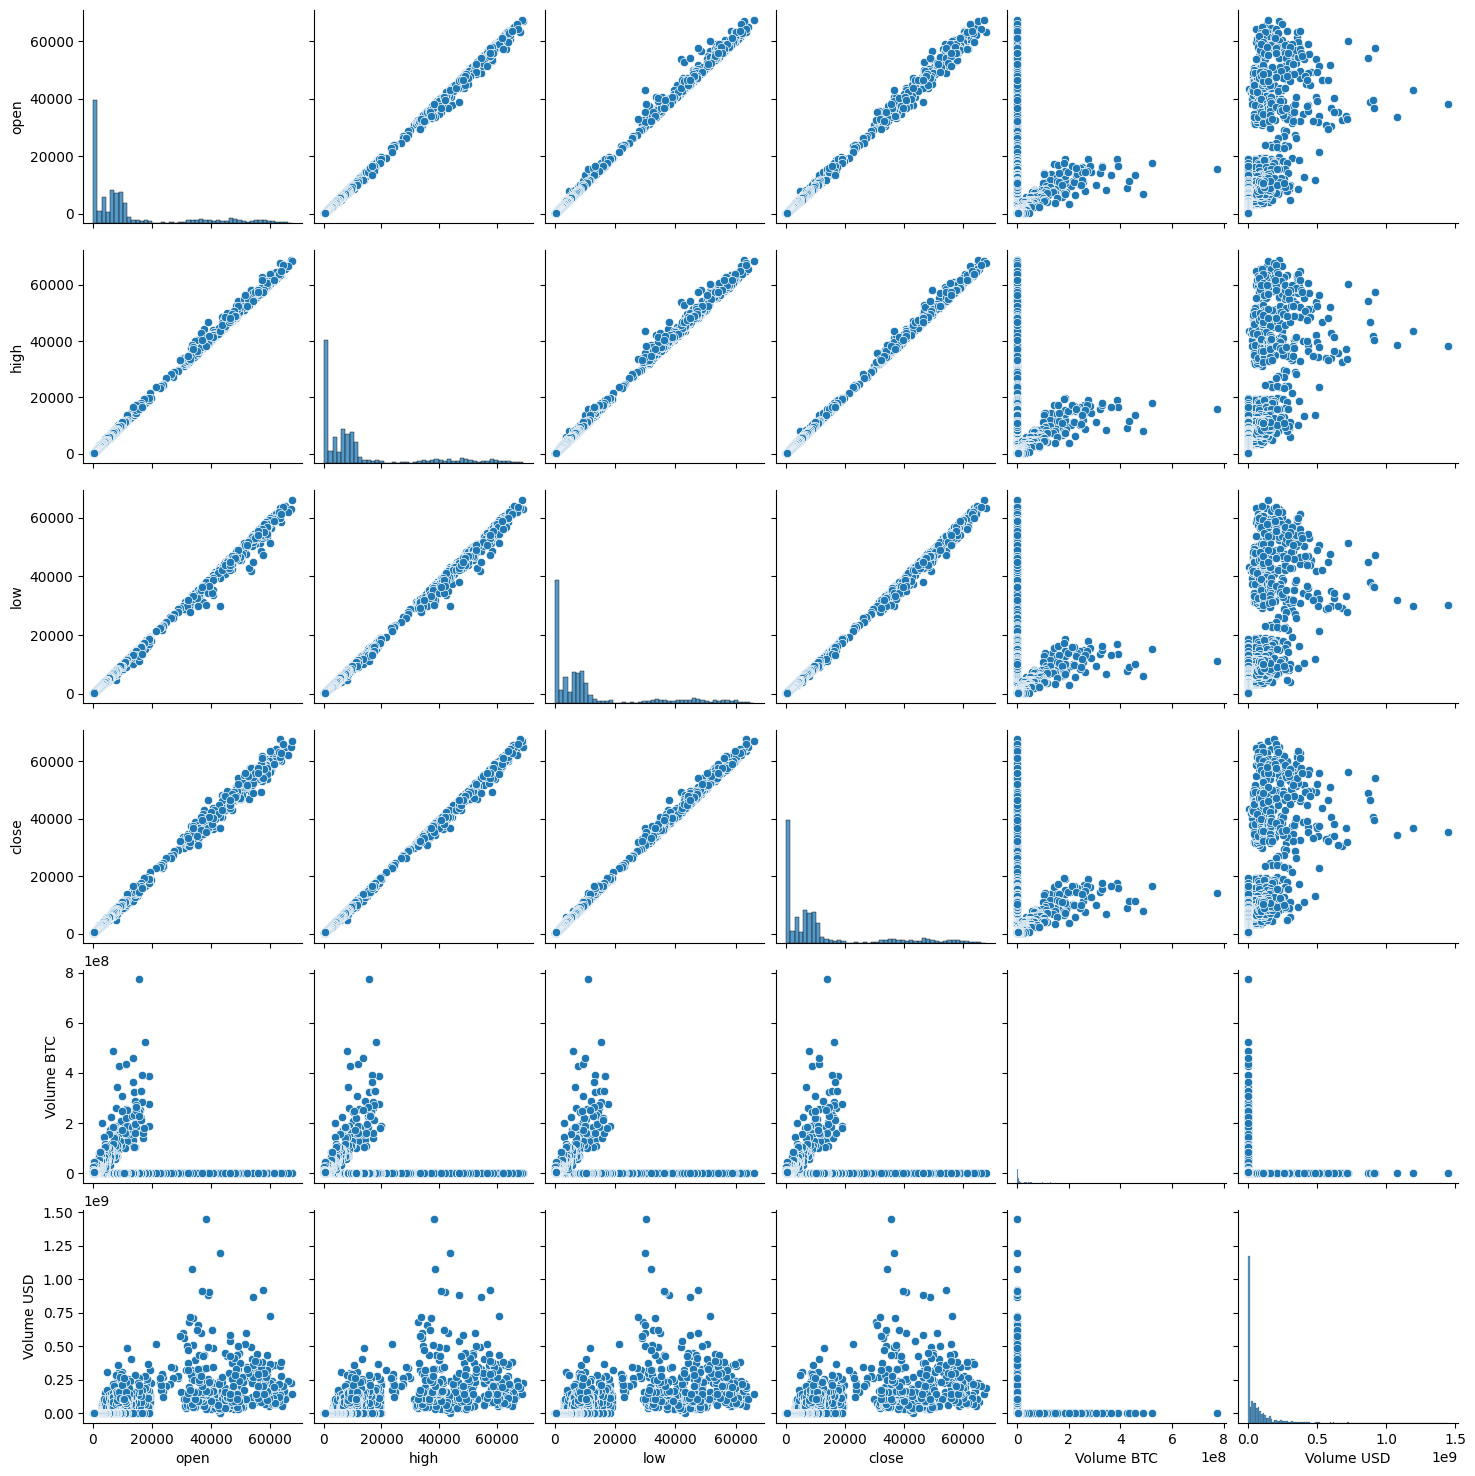

In [340]:
# prompt: scatterplot for numerical cols

import matplotlib.pyplot as plt
import numpy as np
# Select only numerical columns
numerical_cols = df.select_dtypes(include=np.number)

# Create a pairplot
sns.pairplot(numerical_cols)
plt.show()


Thus using pair plot to understand correlation between variables. Most corr b/w high low close open.
Graph betw them is thus linear.

*   Volume USD showed most extreme rise at close 40k
* Volume BTC showed most rise or outlier at close 20 k
*   Scatterplots suggest that thr USD value is quite a bit constant regardless of increasing the close value with some outliers(peaks)



In [341]:
df.isna().sum()

,0
open,0
high,0
low,0
close,0
Volume BTC,0
Volume USD,0


In [342]:


df = df.reset_index()


In [343]:
df.head()

,date,open,high,low,close,Volume BTC,Volume USD
0,2022-03-01,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,2022-02-28,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,2022-02-27,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,2022-02-26,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,2022-02-25,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


Thus adding a buy or sell decider according to profit or loss. 1 indicates price going up and 0 indicates price going down

In [344]:
df['price_direction'] = (df['close'].shift(-1) > df['close']).astype(int)
df.head()

,date,open,high,low,close,Volume BTC,Volume USD,price_direction
0,2022-03-01,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06,0
1,2022-02-28,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08,0
2,2022-02-27,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07,1
3,2022-02-26,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07,1
4,2022-02-25,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07,0


Upon further research into the topic i found out there are 4 most important indicators used by traders.
Hence including **MACD RSI EMA VWAP**

So the problem statement has been changed to a classification problem to find when to buy and when to sell the stock

In [345]:
# prompt: check if plot skewed or normal or what for each variable

from scipy.stats import skew

# Loop through numerical columns and check skewness
for column in numerical_cols:
  skewness = skew(df[column])
  print(f"Skewness of {column}: {skewness}")

  # Interpretation based on skewness
  if skewness > 1 or skewness < -1:
    print(f"The distribution of {column} is highly skewed.")
  elif 0.5 < skewness < 1 or -1 < skewness < -0.5:
    print(f"The distribution of {column} is moderately skewed.")
  else:
    print(f"The distribution of {column} is approximately symmetrical.")

  print("-" * 20)


Skewness of open: 1.7933254769311058
The distribution of open is highly skewed.
--------------------
Skewness of high: 1.781905934828654
The distribution of high is highly skewed.
--------------------
Skewness of low: 1.8041741016787267
The distribution of low is highly skewed.
--------------------
Skewness of close: 1.7899285460342782
The distribution of close is highly skewed.
--------------------
Skewness of Volume BTC: 6.307743629716544
The distribution of Volume BTC is highly skewed.
--------------------
Skewness of Volume USD: 4.234971508680988
The distribution of Volume USD is highly skewed.
--------------------


In [346]:


import numpy as np
# Apply log transformation to highly skewed columns
for column in numerical_cols:
  skewness = skew(df[column])
  if skewness > 1 or skewness < -1:
    df[column] = np.log1p(df[column])

# Recheck skewness after transformation
for column in numerical_cols:
  skewness = skew(df[column])
  print(f"Skewness of {column} after transformation: {skewness}")

  # Interpretation based on skewness
  if skewness > 1 or skewness < -1:
    print(f"The distribution of {column} is highly skewed.")
  elif 0.5 < skewness < 1 or -1 < skewness < -0.5:
    print(f"The distribution of {column} is moderately skewed.")
  else:
    print(f"The distribution of {column} is approximately symmetrical.")

  print("-" * 20)


Skewness of open after transformation: -0.2022422522678076
The distribution of open is approximately symmetrical.
--------------------
Skewness of high after transformation: -0.20416029210698122
The distribution of high is approximately symmetrical.
--------------------
Skewness of low after transformation: -0.2016525556960711
The distribution of low is approximately symmetrical.
--------------------
Skewness of close after transformation: -0.20339497068392573
The distribution of close is approximately symmetrical.
--------------------
Skewness of Volume BTC after transformation: 0.32671875621712343
The distribution of Volume BTC is approximately symmetrical.
--------------------
Skewness of Volume USD after transformation: -0.24065001977363162
The distribution of Volume USD is approximately symmetrical.
--------------------


<Figure size 1200x600 with 0 Axes>

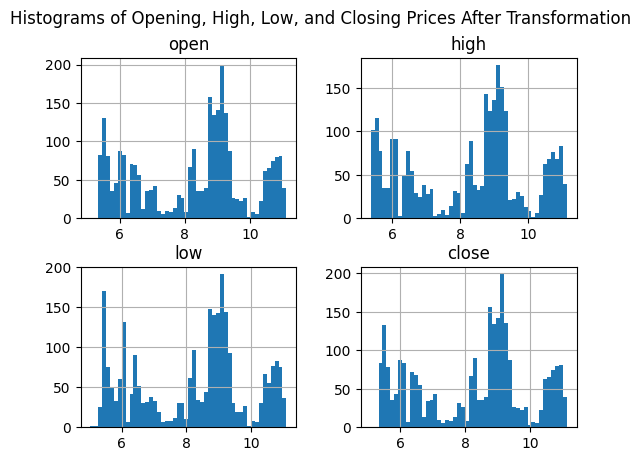

In [347]:

import matplotlib.pyplot as plt
# Histograms for key features after transformation
plt.figure(figsize=(12, 6))
df[['open', 'high', 'low', 'close']].hist(bins=50)
plt.suptitle('Histograms of Opening, High, Low, and Closing Prices After Transformation')
plt.show()


In [348]:
#RSI indicator
# RSI values over 70 indicate an overbought condition (sell signal), while values under 30 indicate an oversold condition (buy signal).

In [349]:


import pandas as pd
# Assuming 'date' is your index
train_df = df[df['date'] < pd.to_datetime('2021-01-01').date()]
test_df = df[df['date'] >= pd.to_datetime('2021-01-01').date()]
print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)


Train DataFrame shape: (2226, 8)
Test DataFrame shape: (425, 8)


In [350]:


print(train_df['price_direction'].value_counts())


price_direction
0    1214
1    1012
Name: count, dtype: int64


In [351]:
train_df.head()

,date,open,high,low,close,Volume BTC,Volume USD,price_direction
425,2020-12-31,10.271397,10.285377,10.237519,10.274837,9.156800,19.431497,0
426,2020-12-30,10.217239,10.275441,10.215717,10.270984,9.370990,19.641854,0
427,2020-12-29,10.205032,10.218152,10.159402,10.217239,9.167253,19.384352,0
428,2020-12-28,10.175186,10.221013,10.168947,10.205032,8.985793,19.190663,0
429,2020-12-27,10.183914,10.253403,10.157005,10.175825,9.490645,19.666357,1


In [352]:
# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Add RSI to the dataframe
train_df['RSI'] = calculate_rsi(train_df)


train_df[['close', 'RSI']].head() # Removed 'date' from the column selection


<ipython-input-352-607b06b3068b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['RSI'] = calculate_rsi(train_df)


,close,RSI
425,10.274837,NaN
426,10.270984,NaN
427,10.217239,NaN
428,10.205032,NaN
429,10.175825,NaN


In [353]:
# Calculate EWMA with a span of 14 periods
train_df['EWMA_14'] = train_df['close'].ewm(span=14, adjust=False).mean()

# Calculate MACD with Fast EMA (12 periods), Slow EMA (26 periods), and Signal line (9 periods)
train_df['EMA_12'] = train_df['close'].ewm(span=12, adjust=False).mean()
train_df['EMA_26'] = train_df['close'].ewm(span=26, adjust=False).mean()

# MACD line (difference between fast and slow EMA)
train_df['MACD'] = train_df['EMA_12'] - train_df['EMA_26']

# Signal line (9 period EMA of the MACD line)
train_df['Signal_Line'] = train_df['MACD'].ewm(span=9, adjust=False).mean()

# RSI Buy and Sell Signals
train_df['Buy_Signal_RSI'] = (train_df['RSI'] < 45)
train_df['Sell_Signal_RSI'] = (train_df['RSI'] > 55)

# MACD Buy and Sell Signals
train_df['Buy_Signal_MACD'] = (train_df['MACD'] > train_df['Signal_Line'])
train_df['Sell_Signal_MACD'] = (train_df['MACD'] < train_df['Signal_Line'])

# EMA Buy and Sell Signals (short-term vs. long-term EMA crossover)
train_df['Buy_Signal_EMA'] = (train_df['EMA_12'] > train_df['EMA_26'])
train_df['Sell_Signal_EMA'] = (train_df['EMA_12'] < train_df['EMA_26'])

# Calculate VWAP
train_df['VWAP'] = (train_df['Volume BTC'] * (train_df['high'] + train_df['low'] + train_df['close']) / 3).cumsum() / train_df['Volume BTC'].cumsum()

# VWAP Buy and Sell Signals
train_df['Buy_Signal_VWAP'] = (train_df['close'] < train_df['VWAP'])
train_df['Sell_Signal_VWAP'] = (train_df['close'] > train_df['VWAP'])

# Combine multiple buy signals for a final buy signal (logical AND across the indicators)
train_df['Buy'] = (train_df['Buy_Signal_RSI']) & (train_df['Buy_Signal_MACD']) & (train_df['Buy_Signal_VWAP'])

# Combine multiple sell signals for a final sell signal
train_df['Sell'] = (train_df['Sell_Signal_RSI']) & (train_df['Sell_Signal_MACD']) & (train_df['Sell_Signal_VWAP'])

train_df['Action'] = 'Hold'  # Default action is hold
train_df.loc[train_df['Buy'], 'Action'] = 'Buy'
train_df.loc[train_df['Sell'], 'Action'] = 'Sell'

# Display the updated DataFrame with the 'Action' column
train_df[['Buy', 'Sell', 'Action']].head(20)
train_df.head()

train_df.columns



<ipython-input-353-f412632291e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['EWMA_14'] = train_df['close'].ewm(span=14, adjust=False).mean()
<ipython-input-353-f412632291e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['EMA_12'] = train_df['close'].ewm(span=12, adjust=False).mean()
<ipython-input-353-f412632291e8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Index(['date', 'open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD',
       'price_direction', 'RSI', 'EWMA_14', 'EMA_12', 'EMA_26', 'MACD',
       'Signal_Line', 'Buy_Signal_RSI', 'Sell_Signal_RSI', 'Buy_Signal_MACD',
       'Sell_Signal_MACD', 'Buy_Signal_EMA', 'Sell_Signal_EMA', 'VWAP',
       'Buy_Signal_VWAP', 'Sell_Signal_VWAP', 'Buy', 'Sell', 'Action'],
      dtype='object')

In [354]:
#Handling data imbalances

In [355]:


print(train_df['Action'].value_counts())


Action
Hold    1844
Buy      353
Sell      29
Name: count, dtype: int64


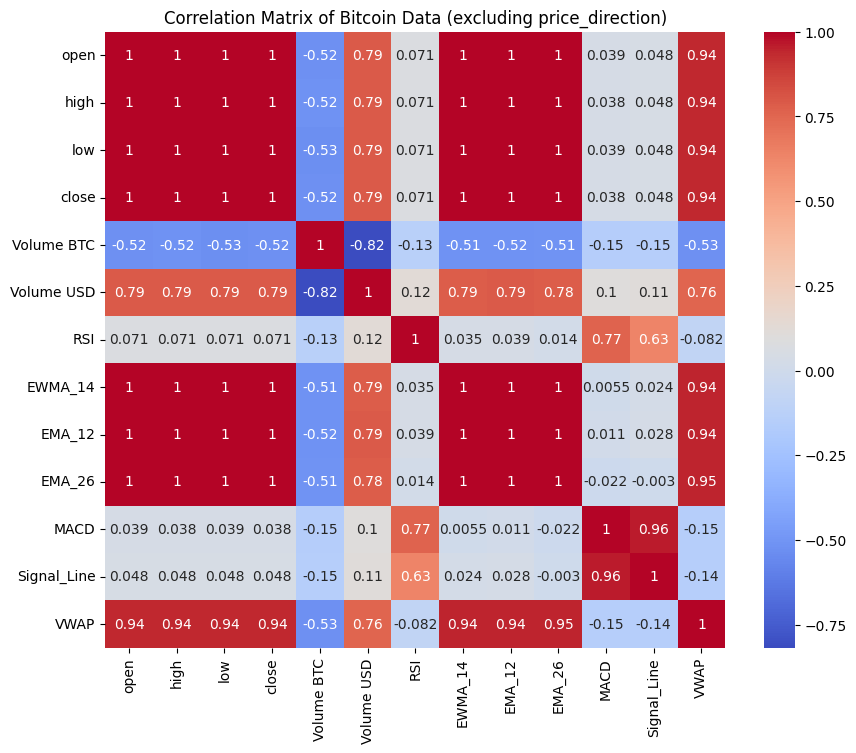

In [356]:


import matplotlib.pyplot as plt
import numpy as np
# Select only numerical columns, excluding 'date'
numerical_cols = train_df.select_dtypes(include=np.number).drop('price_direction', axis=1)

# Create a correlation matrix
corr_matrix = numerical_cols.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Bitcoin Data (excluding price_direction)')
plt.show()


In [357]:

df_2 = train_df[['date', 'close', 'Volume BTC', 'Volume USD', 'Action', 'price_direction']]
df_2

,date,close,Volume BTC,Volume USD,Action,price_direction
425,2020-12-31,10.274837,9.156800,19.431497,Hold,0
426,2020-12-30,10.270984,9.370990,19.641854,Hold,0
427,2020-12-29,10.217239,9.167253,19.384352,Hold,0
428,2020-12-28,10.205032,8.985793,19.190663,Hold,0
429,2020-12-27,10.175825,9.490645,19.666357,Hold,1
...,...,...,...,...,...,...
2646,2014-12-02,5.940829,14.768549,8.829597,Hold,0
2647,2014-12-01,5.938565,14.740033,8.804109,Hold,0
2648,2014-11-30,5.925164,13.951411,8.022021,Hold,1
2649,2014-11-29,5.934153,14.825713,8.888231,Hold,0


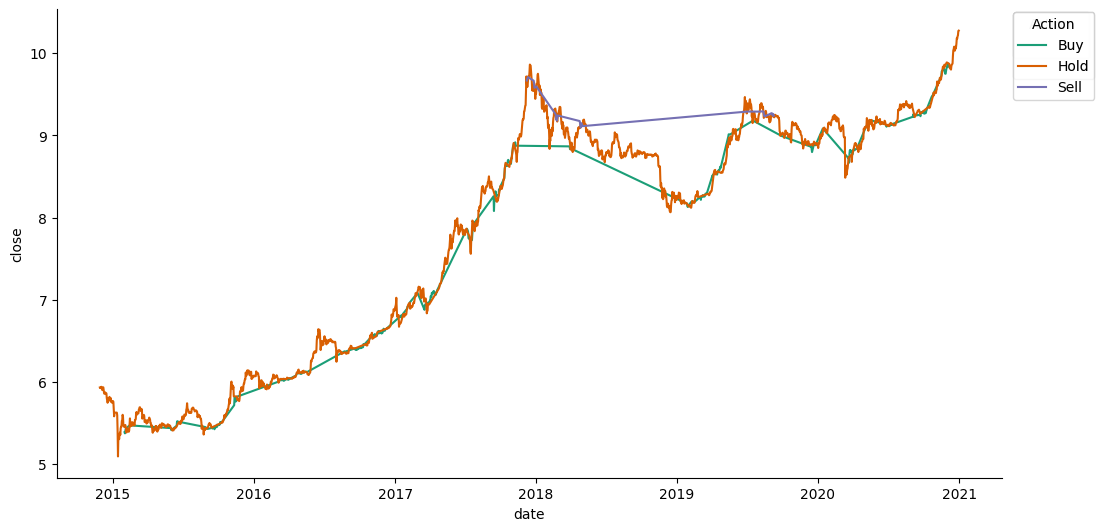

In [358]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_2.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Action')):
  _plot_series(series, series_name, i)
  fig.legend(title='Action', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('close')

In [359]:
df_2['Action'].value_counts()

,count
Action,
Hold,1844
Buy,353
Sell,29


To use date type datatype during smote we take days from start

For predicting price direction, the output will be 0 (downtrend) or 1 (uptrend).

For predicting trading decisions, the output will represent buy or sell signals based on your defined criteria (RSI, MACD, VWAP, etc.).

FOR TEST DATA

In [360]:
# Ensure test_df has the required columns before starting
test_df['RSI'] = calculate_rsi(test_df)

# Calculate EWMA with a span of 14 periods for test data
test_df['EWMA_14'] = test_df['close'].ewm(span=14, adjust=False).mean()

# MACD calculation for test data
# Fast EMA (12 periods), Slow EMA (26 periods), and Signal line (9 periods)
test_df['EMA_12'] = test_df['close'].ewm(span=12, adjust=False).mean()
test_df['EMA_26'] = test_df['close'].ewm(span=26, adjust=False).mean()

# MACD line (difference between fast and slow EMA)
test_df['MACD'] = test_df['EMA_12'] - test_df['EMA_26']

# Signal line (9 period EMA of the MACD line)
test_df['Signal_Line'] = test_df['MACD'].ewm(span=9, adjust=False).mean()

# RSI Buy and Sell Signals for test data
test_df['Buy_Signal_RSI'] = (test_df['RSI'] < 45)
test_df['Sell_Signal_RSI'] = (test_df['RSI'] > 55)

# MACD Buy and Sell Signals for test data
test_df['Buy_Signal_MACD'] = (test_df['MACD'] > test_df['Signal_Line'])
test_df['Sell_Signal_MACD'] = (test_df['MACD'] < test_df['Signal_Line'])

# EMA Buy and Sell Signals (short-term vs. long-term EMA crossover)
test_df['Buy_Signal_EMA'] = (test_df['EMA_12'] > test_df['EMA_26'])
test_df['Sell_Signal_EMA'] = (test_df['EMA_12'] < test_df['EMA_26'])

# Calculate VWAP for test data
test_df['VWAP'] = (test_df['Volume BTC'] * (test_df['high'] + test_df['low'] + test_df['close']) / 3).cumsum() / test_df['Volume BTC'].cumsum()

# VWAP Buy and Sell Signals for test data
test_df['Buy_Signal_VWAP'] = (test_df['close'] < test_df['VWAP'])
test_df['Sell_Signal_VWAP'] = (test_df['close'] > test_df['VWAP'])

# Combine multiple buy signals for a final buy signal (logical AND across the indicators)
test_df['Buy'] = (test_df['Buy_Signal_RSI']) & (test_df['Buy_Signal_MACD']) & (test_df['Buy_Signal_VWAP'])

# Combine multiple sell signals for a final sell signal (logical AND across the indicators)
test_df['Sell'] = (test_df['Sell_Signal_RSI']) & (test_df['Sell_Signal_MACD']) & (test_df['Sell_Signal_VWAP'])

# Default action is Hold for test data
test_df['Action'] = 'Hold'

# Update 'Action' column based on Buy and Sell signals
test_df.loc[test_df['Buy'], 'Action'] = 'Buy'
test_df.loc[test_df['Sell'], 'Action'] = 'Sell'

# Drop any rows with NaN values (if necessary)
test_df.dropna(inplace=True)

# Check the updated test data with 'Action' column
test_df.head(20)


<ipython-input-360-eb15f0228a73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['RSI'] = calculate_rsi(test_df)  # Assuming you have a function 'calculate_rsi'
<ipython-input-360-eb15f0228a73>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['EWMA_14'] = test_df['close'].ewm(span=14, adjust=False).mean()
<ipython-input-360-eb15f0228a73>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,date,open,high,low,close,Volume BTC,Volume USD,price_direction,RSI,EWMA_14,...,Buy_Signal_MACD,Sell_Signal_MACD,Buy_Signal_EMA,Sell_Signal_EMA,VWAP,Buy_Signal_VWAP,Sell_Signal_VWAP,Buy,Sell,Action
13,2022-02-16,10.705304,10.705304,10.676227,10.689726,7.133163,17.822068,1,51.792130,10.605839,...,True,False,False,True,10.585194,False,True,False,False,Hold
14,2022-02-15,10.658864,10.709666,10.656576,10.705119,7.480949,18.185481,0,53.357102,10.619077,...,True,False,False,True,10.592358,False,True,False,False,Hold
15,2022-02-14,10.647317,10.665990,10.635278,10.658231,7.148257,17.805677,0,48.569616,10.624297,...,True,False,False,True,10.596071,False,True,False,False,Hold
16,2022-02-13,10.650973,10.663840,10.642648,10.647298,6.246990,16.892326,1,63.811730,10.627364,...,True,False,True,False,10.598867,False,True,False,False,Hold
17,2022-02-12,10.654744,10.669769,10.639241,10.651173,6.794973,17.445002,1,60.478027,10.630538,...,True,False,True,False,10.601715,False,True,False,False,Hold
18,2022-02-11,10.681462,10.691279,10.645047,10.655073,7.683115,18.337704,1,60.665681,10.633810,...,True,False,True,False,10.605176,False,True,False,False,Hold
19,2022-02-10,10.701608,10.733152,10.673829,10.681105,7.898643,18.579353,1,67.066095,10.640116,...,True,False,True,False,10.610102,False,True,False,False,Hold
20,2022-02-09,10.694395,10.711452,10.672785,10.701622,7.394422,18.095406,0,74.371577,10.648317,...,True,False,True,False,10.614217,False,True,False,False,Hold
21,2022-02-08,10.689592,10.725512,10.662005,10.694046,7.860494,18.554132,0,70.741699,10.654414,...,True,False,True,False,10.618106,False,True,False,False,Hold
22,2022-02-07,10.655404,10.703810,10.637851,10.688987,7.864216,18.552796,0,76.724831,10.659024,...,True,False,True,False,10.620844,False,True,False,False,Hold


In [361]:


df_2_test = test_df[['date', 'close', 'Volume BTC', 'Volume USD', 'price_direction','Action']]
df_2_test


,date,close,Volume BTC,Volume USD,price_direction,Action
13,2022-02-16,10.689726,7.133163,17.822068,1,Hold
14,2022-02-15,10.705119,7.480949,18.185481,0,Hold
15,2022-02-14,10.658231,7.148257,17.805677,0,Hold
16,2022-02-13,10.647298,6.246990,16.892326,1,Hold
17,2022-02-12,10.651173,6.794973,17.445002,1,Hold
...,...,...,...,...,...,...
420,2021-01-05,10.435293,9.602889,20.038085,0,Hold
421,2021-01-04,10.373706,10.018954,20.392584,1,Hold
422,2021-01-03,10.407253,9.558288,19.965440,0,Hold
423,2021-01-02,10.380266,9.790816,20.170995,0,Hold


In [362]:
df_2

,date,close,Volume BTC,Volume USD,Action,price_direction
425,2020-12-31,10.274837,9.156800,19.431497,Hold,0
426,2020-12-30,10.270984,9.370990,19.641854,Hold,0
427,2020-12-29,10.217239,9.167253,19.384352,Hold,0
428,2020-12-28,10.205032,8.985793,19.190663,Hold,0
429,2020-12-27,10.175825,9.490645,19.666357,Hold,1
...,...,...,...,...,...,...
2646,2014-12-02,5.940829,14.768549,8.829597,Hold,0
2647,2014-12-01,5.938565,14.740033,8.804109,Hold,0
2648,2014-11-30,5.925164,13.951411,8.022021,Hold,1
2649,2014-11-29,5.934153,14.825713,8.888231,Hold,0


In [363]:


from sklearn.preprocessing import LabelEncoder

# Assuming 'df_2' is your DataFrame
le = LabelEncoder()
df_2['Action_encoded'] = le.fit_transform(df_2['Action'])

df_2.head()


<ipython-input-363-bc187f3866bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Action_encoded'] = le.fit_transform(df_2['Action'])


,date,close,Volume BTC,Volume USD,Action,price_direction,Action_encoded
425,2020-12-31,10.274837,9.156800,19.431497,Hold,0,1
426,2020-12-30,10.270984,9.370990,19.641854,Hold,0,1
427,2020-12-29,10.217239,9.167253,19.384352,Hold,0,1
428,2020-12-28,10.205032,8.985793,19.190663,Hold,0,1
429,2020-12-27,10.175825,9.490645,19.666357,Hold,1,1


In [364]:


from sklearn.preprocessing import LabelEncoder

# Assuming 'df_2' is your DataFrame
le = LabelEncoder()
df_2_test['Action_encoded'] = le.fit_transform(df_2_test['Action'])

df_2_test.head()


<ipython-input-364-e1177741cc01>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_test['Action_encoded'] = le.fit_transform(df_2_test['Action'])


,date,close,Volume BTC,Volume USD,price_direction,Action,Action_encoded
13,2022-02-16,10.689726,7.133163,17.822068,1,Hold,1
14,2022-02-15,10.705119,7.480949,18.185481,0,Hold,1
15,2022-02-14,10.658231,7.148257,17.805677,0,Hold,1
16,2022-02-13,10.647298,6.246990,16.892326,1,Hold,1
17,2022-02-12,10.651173,6.794973,17.445002,1,Hold,1


In [365]:
# prompt: use minmaxscaler to fit on train and tranofrm train and test and make a datfraje at the end

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the columns you want to scale (e.g., 'open', 'high', 'low', 'close', 'Volume USD', 'Volume BTC', 'RSI', 'EWMA_14', 'MACD', 'Signal_Line')
numerical_columns = ['close', 'Volume USD', 'Volume BTC']

# Fit the scaler on the training data and transform it
train_scaled = scaler.fit_transform(df_2[numerical_columns])

# Transform the test data using the same scaler
test_scaled = scaler.transform(df_2_test[numerical_columns])

# Convert the scaled data back to DataFrames
train_df_scaled = pd.DataFrame(train_scaled, columns=numerical_columns, index=df_2.index)
test_df_scaled = pd.DataFrame(test_scaled, columns=numerical_columns, index=df_2_test.index)


train_df_scaled




,close,Volume USD,Volume BTC
425,1.000000,0.968571,0.447439
426,0.999256,0.979056,0.457905
427,0.988883,0.966221,0.447950
428,0.986527,0.956567,0.439083
429,0.980890,0.980278,0.463752
...,...,...,...
2646,0.163494,0.440115,0.721652
2647,0.163057,0.438844,0.720258
2648,0.160471,0.399861,0.681723
2649,0.162206,0.443038,0.724445


In [366]:
# prompt: add nonnumerical cols to train_df_scaled numerical_columns = ['close', 'Volume USD', 'Volume BTC']

import pandas as pd
# Assuming 'train_df' contains your original DataFrame with non-numerical columns
non_numerical_columns = ['Action_encoded', 'price_direction']

# Concatenate the scaled numerical columns with the original non-numerical columns
train_df_scaled = pd.concat([train_df_scaled, df_2[non_numerical_columns]], axis=1)
train_df_scaled.head()


,close,Volume USD,Volume BTC,Action_encoded,price_direction
425,1.000000,0.968571,0.447439,1,0
426,0.999256,0.979056,0.457905,1,0
427,0.988883,0.966221,0.447950,1,0
428,0.986527,0.956567,0.439083,1,0
429,0.980890,0.980278,0.463752,1,1


In [367]:


print(df_2['Action'].unique())
print(df_2['Action_encoded'].unique())
print(df_2[['Action', 'Action_encoded']].drop_duplicates())


['Hold' 'Buy' 'Sell']
[1 0 2]
    Action  Action_encoded
425   Hold               1
451    Buy               0
904   Sell               2


Hold               1

   Sell               2
   
   Buy               0

In [368]:
import pandas as pd
# Assuming 'train_df' contains your original DataFrame with non-numerical columns
non_numerical_columns = ['Action_encoded', 'price_direction']

# Use the list of column names to select the desired columns
test_df_scaled = pd.concat([test_df_scaled, df_2_test[non_numerical_columns]], axis=1)
test_df_scaled.head()

,close,Volume USD,Volume BTC,Action_encoded,price_direction
13,1.080078,0.888348,0.348556,1,1
14,1.083049,0.906463,0.365550,1,0
15,1.073999,0.887531,0.349293,1,0
16,1.071889,0.842005,0.305254,1,1
17,1.072636,0.869553,0.332030,1,1


In [369]:
test_df

,date,open,high,low,close,Volume BTC,Volume USD,price_direction,RSI,EWMA_14,...,Buy_Signal_MACD,Sell_Signal_MACD,Buy_Signal_EMA,Sell_Signal_EMA,VWAP,Buy_Signal_VWAP,Sell_Signal_VWAP,Buy,Sell,Action
13,2022-02-16,10.705304,10.705304,10.676227,10.689726,7.133163,17.822068,1,51.792130,10.605839,...,True,False,False,True,10.585194,False,True,False,False,Hold
14,2022-02-15,10.658864,10.709666,10.656576,10.705119,7.480949,18.185481,0,53.357102,10.619077,...,True,False,False,True,10.592358,False,True,False,False,Hold
15,2022-02-14,10.647317,10.665990,10.635278,10.658231,7.148257,17.805677,0,48.569616,10.624297,...,True,False,False,True,10.596071,False,True,False,False,Hold
16,2022-02-13,10.650973,10.663840,10.642648,10.647298,6.246990,16.892326,1,63.811730,10.627364,...,True,False,True,False,10.598867,False,True,False,False,Hold
17,2022-02-12,10.654744,10.669769,10.639241,10.651173,6.794973,17.445002,1,60.478027,10.630538,...,True,False,True,False,10.601715,False,True,False,False,Hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2021-01-05,10.375216,10.448744,10.306859,10.435293,9.602889,20.038085,0,45.705008,10.514101,...,True,False,False,True,10.723916,True,False,False,False,Hold
421,2021-01-04,10.406377,10.424385,10.230450,10.373706,10.018954,20.392584,1,39.920957,10.495382,...,False,True,False,True,10.722796,True,False,False,False,Hold
422,2021-01-03,10.380265,10.457401,10.372818,10.407253,9.558288,19.965440,0,44.183051,10.483631,...,False,True,False,True,10.721929,True,False,False,False,Hold
423,2021-01-02,10.289150,10.414333,10.276808,10.380266,9.790816,20.170995,0,42.081716,10.469849,...,False,True,False,True,10.720887,True,False,False,False,Hold


In [370]:
# Check if indices match for train data
print((train_df_scaled.index == df_2.index).all())  # Should print True

# Check if indices match for test data
print((test_df_scaled.index == df_2_test.index).all())  # Should print True

True
True


In [371]:

X_train = train_df_scaled.drop('Action_encoded', axis=1)
y_train = train_df_scaled['Action_encoded']

X_test = test_df_scaled.drop('Action_encoded', axis=1)
y_test = test_df_scaled['Action_encoded']

**Since imbalance cant be solved directly we use models that allow class weighting (like logistic regression or random forests).**

In [375]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


model = LogisticRegression(
    class_weight='balanced',  # Adjust for class imbalance
    C=1,                      # Regularization strength (manually set)
    penalty='l2',              # Regularization type
    solver='liblinear'         # Solver for optimization
)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.055825242718446605
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00       378
           2       0.06      1.00      0.11        23

    accuracy                           0.06       412
   macro avg       0.02      0.33      0.04       412
weighted avg       0.00      0.06      0.01       412



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [376]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,

    max_features='sqrt',
    class_weight='balanced'
)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9174757281553398
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.92      1.00      0.96       378
           2       0.00      0.00      0.00        23

    accuracy                           0.92       412
   macro avg       0.31      0.33      0.32       412
weighted avg       0.84      0.92      0.88       412



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [377]:

from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9174757281553398
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.92      1.00      0.96       378
           2       0.00      0.00      0.00        23

    accuracy                           0.92       412
   macro avg       0.31      0.33      0.32       412
weighted avg       0.84      0.92      0.88       412



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [378]:


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Assuming X_train and y_train are your training data
# Reshape the input data for LSTM (samples, timesteps, features)
# We can set timesteps to 1 for simplicity in this example
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))


# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer with 1 neuron for price prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_lstm, y_train, epochs=20, batch_size=32)

# Make predictions on the test data
y_pred_lstm = model.predict(X_test_lstm)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred_lstm, squared=False)
print(f"LSTM RMSE: {rmse}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6415
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1693
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1643
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1599
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1530
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1615
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1692
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1601
Epoch 9/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1514
Epoch 10/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1523
Epoch 11/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1507
Epoch 12/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1467
Epoch 13/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1597
Epoch 14/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1457
Epoch 15/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1480
Epoch 16/20
70/70 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Thus it can be concluded from the above accuracy that there is roughly 50 % chance of predicting if there can be a rise in price value or fall in the price value

In [379]:


from sklearn.metrics import accuracy_score

# Convert predicted values to binary classifications (e.g., if predicted value > 0.5, classify as 1)
y_pred_lstm_binary = (y_pred_lstm > 0.5).astype(int)

# Calculate accuracy
lstm_accuracy = accuracy_score(y_test, y_pred_lstm_binary)

print(f"LSTM Accuracy: {lstm_accuracy}")


LSTM Accuracy: 0.9174757281553398


**What more to do ?**
**I havent studied anamoly detection till now. Trying a new approach using the same to focus on buying and selling statistcs**